# Figure S2 - Changes in accessory gene frequencies before and after CLARC

## Import relevant packages

In [96]:
import pandas as pd
import numpy as np
import scipy as scipy
import seaborn as sns

## Filtering for accessory COGs

### All carriage Roary i95 pre-CLARC data

In [19]:
# Import Roary output
igopan_all_roary = pd.read_csv('~/gene_presence_absence_roary_allc_i95.csv', low_memory=False) # Get file from gene_presence_absence_roary_allc_i95.csv.zip file in Zenodo folder (10.5281/zenodo.14187853)

In [20]:
# Get list of Roary output names in a list
panroary_ids_list =  list(igopan_all_roary["Gene"])

In [21]:
# First round of filtering by fragment length >150bp OR general isolate frequency >10%

tenp = (igopan_all_roary.shape[1]-14)/10 # Counting number of isolates (first 14 columns are metadata)

roary_onefilt = igopan_all_roary[(igopan_all_roary['Avg group size nuc'] >= 150) | (igopan_all_roary['No. isolates'] >= tenp)]

In [22]:
# Now make gene names the indeces
roary_onefilt.set_index('Gene', inplace=True)

In [23]:
# Drop all columns that are not an isolate
roary_isol = roary_onefilt.iloc[:,13:]

In [24]:
# Now replace NaN values for 0 and any other value for 1
roary_isol[~roary_isol.isnull()] = 1 
roary_isol[roary_isol.isnull()] = 0 

In [25]:
# Switch rows to columns for ease
roary_genefreq_matrix = roary_isol.transpose()
roary_genefreq_matrix.index.name='Accession'

In [26]:
# Alright, now I keep only the isolates that are part of the three datasets (Navajo, Maela, Massachussetts)
#(So the reference isolates are removed), leaving us with 4451 isolates (presumably)

# First we import the list of accession numbers needed
mmn_needed = pd.read_excel('~/MMN-needed.xlsx') # File found in the GitHub repository (https://github.com/IndraGonz/2024_GonzalezOjeda_CLARC)
acc_needed_list =  list(mmn_needed["Accession"])
matrix_acc_list =  list(roary_genefreq_matrix.index)

# The samples from Navajo actually have the filename instead of the accession number, so O get the accession number by eliminating everything after the '_' symbol
roary_genefreq_matrix.index = roary_genefreq_matrix.index.str.split('_').str.get(0)

# ***** Note: This is actually doing this to all isolates, including non navajo ones. If I wanted to filter for another location I wouldn't necessarily do this *****

In [27]:
# Get only isolates in the list
genefreq_mat_filt = roary_genefreq_matrix[roary_genefreq_matrix.index.isin(acc_needed_list)]

In [28]:
# Now we import the metadata including the filenames
mmn_meta = pd.read_excel('~/MMN-meta-specific.xlsx') # File found in the GitHub repository (https://github.com/IndraGonz/2024_GonzalezOjeda_CLARC)
acc_meta_list =  list(mmn_meta["Accession"])

In [29]:
# Get only isolates in the metadata list
genefreq_meta_filt = roary_genefreq_matrix[roary_genefreq_matrix.index.isin(acc_meta_list)]

In [15]:
# Throw accession numbers to first column
#genefreq_meta_filt = genefreq_meta_filt.set_index('Accession')

In [32]:
# Next step is to merge metadata with filtered roary output file
merge_presabs_allgenes = pd.merge(mmn_meta,genefreq_meta_filt, on='Accession')

In [33]:
# Now group by dataset
presabs_grouped_dataset = merge_presabs_allgenes.groupby('Dataset')

# Now get dataframe for each dataset
presabs_meta_navajo = presabs_grouped_dataset.get_group('Navajo')

In [35]:
# Now drop metadata columns and only keep COG columns
presabs_cog_navajo = presabs_meta_navajo.iloc[:,12:]

In [36]:
# Now we filter by frequency per each dataset (this can change depending on the datasets we want to include)

# Write function that loops through each gene column and returns the frequency in the dataframe
def get_freq(dataframe):
    
    cog_list = []
    freq_list = []
    
    for element in dataframe.columns:
        
        freq_dataframe = pd.DataFrame()
        cog_freq = (dataframe[element].sum())/(dataframe.shape[0])
        
        cog_list.append(element)
        freq_list.append(cog_freq)
        
    freq_dataframe['COG_name'] = cog_list
    freq_dataframe['freq'] = freq_list
    
    return(freq_dataframe)

In [37]:
# Get list of genes and their frequency for each dataset individually (and for all datasets as well

#Navajo all
freq_cog_navajo = get_freq(presabs_cog_navajo)

In [38]:
# Now filter to only keep cogs with frequency between 5 and 95% in each dataset (and all 3 datasets)
acc_cog_navajo = freq_cog_navajo.loc[(freq_cog_navajo['freq'] >= 0.05) & (freq_cog_navajo['freq'] <= 0.95)]

In [39]:
# Get the number of accessory cogs per dataset
acccog_num_navajo = acc_cog_navajo.shape[0]

# First get accessory cog names as lists
acccog_name_navajo_list = list(acc_cog_navajo["COG_name"])

In [40]:
print('# of accessory COGs in Southwest US dataset:', acccog_num_navajo)

# of accessory COGs in Southwest US dataset: 3779


### Post-CLARC data

In [54]:
# Import CLARC output
clarc_genefreq_matrix = pd.read_csv('~/clarc_condensed_gene_presence_absence.csv', low_memory=False, index_col=0) # Zipped file found in the GitHub repository (https://github.com/IndraGonz/2024_GonzalezOjeda_CLARC)

In [55]:
# The samples from Navajo actually have the filename instead of the accession number, so O get the accession number by eliminating everything after the '_' symbol
clarc_genefreq_matrix.index = clarc_genefreq_matrix.index.str.split('_').str.get(0)

In [57]:
# Get only isolates in the metadata list
genefreq_meta_filt_clarc = clarc_genefreq_matrix[clarc_genefreq_matrix.index.isin(acc_meta_list)]

In [59]:
# Throw accession numbers to first column
genefreq_meta_filt_clarc.index.name = 'Accession'
genefreq_meta_filt_clarc = genefreq_meta_filt_clarc.reset_index(drop=False)

In [61]:
# Next step is to merge metadata with filtered roary output file
merge_presabs_allgenes_clarc = pd.merge(mmn_meta,genefreq_meta_filt_clarc, on='Accession')

In [62]:
# Now group by dataset
presabs_grouped_dataset_clarc = merge_presabs_allgenes_clarc.groupby('Dataset')

# Now get dataframe for each dataset
presabs_meta_navajo_clarc = presabs_grouped_dataset_clarc.get_group('Navajo')

In [63]:
# Now drop metadata columns and only keep COG columns
presabs_cog_navajo_clarc = presabs_meta_navajo_clarc.iloc[:,12:]

In [64]:
# Get list of genes and their frequency for each dataset individually (and for all datasets as well

#Navajo all
freq_cog_navajo_clarc = get_freq(presabs_cog_navajo_clarc)

In [65]:
# Now filter to only keep cogs with frequency between 5 and 95% in each dataset (and all 3 datasets)
acc_cog_navajo_clarc = freq_cog_navajo_clarc.loc[(freq_cog_navajo_clarc['freq'] >= 0.05) & (freq_cog_navajo_clarc['freq'] <= 0.95)]

In [66]:
# Get the number of accessory cogs per dataset
acccog_num_navajo_clarc = acc_cog_navajo_clarc.shape[0]

# First get accessory cog names as lists
acccog_name_navajo_list_clarc = list(acc_cog_navajo_clarc["COG_name"])

In [67]:
print('# of accessory COGs in Navajo dataset post-CLARC:', acccog_num_navajo_clarc)

# of accessory COGs in Navajo dataset post-CLARC: 2393


## Plotting accessory gene frequencies before and after vaccination (Pickle plots)

### Separate samples into pre and post vaccine (Roary)

In [73]:
# Add column with vaccine type (VT or NVT, for PCV7)
# (PCV7 targets the following vaccine types = "4", "6A", "6B", "9V", "14", "18C", "19F", "23F")
navajo_pan_acc = presabs_meta_navajo.copy()

# Keep only accessory gene columns

# Get all columns
all_columns = navajo_pan_acc.columns.tolist()

# Select columns to keep
columns_to_select = all_columns[:14] + acccog_name_navajo_list

# Filter the DataFrame
navajo_pan_acc = navajo_pan_acc[columns_to_select]

# Extracting last 4 digits of 'Filename' to generate 'year' column
year = navajo_pan_acc.loc[:,'Filename'].str[-4:]
navajo_pan_acc.loc[:,'year'] = year

# Changing 'year' datatype to numeric, to do logical operations
navajo_pan_acc['year'] = navajo_pan_acc.loc[:,'year'].astype('int64')

# Add Epoch column
navajo_pan_acc.insert(4, 'epoch', " ")

# Determine epoch using previously outlined cutoffs
navajo_pan_acc.loc[(navajo_pan_acc['year'] >= 1998) & (navajo_pan_acc['year'] <= 2001), 'epoch'] = 'E1'
navajo_pan_acc.loc[(navajo_pan_acc['year'] >= 2006) & (navajo_pan_acc['year'] <= 2008), 'epoch'] = 'E2'
navajo_pan_acc.loc[(navajo_pan_acc['year'] >= 2010) & (navajo_pan_acc['year'] <= 2012), 'epoch'] = 'E3'

# Get datasets per epoch
navajo_e1 = navajo_pan_acc.loc[navajo_pan_acc['epoch'] == 'E1'].copy()
navajo_e2 = navajo_pan_acc.loc[navajo_pan_acc['epoch'] == 'E2'].copy()
navajo_e3 = navajo_pan_acc.loc[navajo_pan_acc['epoch'] == 'E3'].copy()

In [74]:
# Now to determine global COG frequencies (not per strain)
# (this is the second input of the QP function, for the population that is being used to predict strain frequencies)

# Navajo E1
navajo_e1_gf = navajo_e1.iloc[:,15:]
navajo_e1_gf = navajo_e1_gf.drop(columns=['year'])
navajo_e1_gfreq = navajo_e1_gf.mean()
navajo_e1_gfreq = navajo_e1_gfreq.sort_index(axis=0)

# Navajo E2
navajo_e2_gf = navajo_e2.iloc[:,15:]
navajo_e2_gf = navajo_e2_gf.drop(columns=['year'])
navajo_e2_gfreq = navajo_e2_gf.mean()
navajo_e2_gfreq = navajo_e2_gfreq.sort_index(axis=0)

# Navajo E3
navajo_e3_gf = navajo_e3.iloc[:,15:]
navajo_e3_gf = navajo_e3_gf.drop(columns=['year'])
navajo_e3_gfreq = navajo_e3_gf.mean()
navajo_e3_gfreq = navajo_e3_gfreq.sort_index(axis=0)

In [75]:
navajo_alle_freq_roary = pd.DataFrame(columns=['acc_COG','global_freq_E1','global_freq_E2','global_freq_E3'])
navajo_alle_freq_roary['acc_COG'] = navajo_e2_gfreq.index
navajo_alle_freq_roary['global_freq_E1'] = navajo_e1_gfreq.values
navajo_alle_freq_roary['global_freq_E2'] = navajo_e2_gfreq.values
navajo_alle_freq_roary['global_freq_E3'] = navajo_e3_gfreq.values

In [76]:
# Divide per epoch
navajo_e1_gfreq_roary = navajo_alle_freq_roary['global_freq_E1']
navajo_e2_gfreq_roary = navajo_alle_freq_roary['global_freq_E2']
navajo_e3_gfreq_roary = navajo_alle_freq_roary['global_freq_E3']

### Separate samples into pre and post vaccine (Roary+CLARC)

In [79]:
# Add column with vaccine type (VT or NVT, for PCV7)
# (PCV7 targets the following vaccine types = "4", "6A", "6B", "9V", "14", "18C", "19F", "23F")
navajo_pan_acc = presabs_meta_navajo_clarc.copy()

# Keep only accessory gene columns

# Get all columns
all_columns = navajo_pan_acc.columns.tolist()

# Select columns to keep
columns_to_select = all_columns[:14] + acccog_name_navajo_list_clarc

# Filter the DataFrame
navajo_pan_acc = navajo_pan_acc[columns_to_select]

# Extracting last 4 digits of 'Filename' to generate 'year' column
year = navajo_pan_acc.loc[:,'Filename'].str[-4:]
navajo_pan_acc.loc[:,'year'] = year

# Changing 'year' datatype to numeric, to do logical operations
navajo_pan_acc['year'] = navajo_pan_acc.loc[:,'year'].astype('int64')

# Add Epoch column
navajo_pan_acc.insert(4, 'epoch', " ")

# Determine epoch using previously outlined cutoffs
navajo_pan_acc.loc[(navajo_pan_acc['year'] >= 1998) & (navajo_pan_acc['year'] <= 2001), 'epoch'] = 'E1'
navajo_pan_acc.loc[(navajo_pan_acc['year'] >= 2006) & (navajo_pan_acc['year'] <= 2008), 'epoch'] = 'E2'
navajo_pan_acc.loc[(navajo_pan_acc['year'] >= 2010) & (navajo_pan_acc['year'] <= 2012), 'epoch'] = 'E3'

# Get datasets per epoch
navajo_e1 = navajo_pan_acc.loc[navajo_pan_acc['epoch'] == 'E1'].copy()
navajo_e2 = navajo_pan_acc.loc[navajo_pan_acc['epoch'] == 'E2'].copy()
navajo_e3 = navajo_pan_acc.loc[navajo_pan_acc['epoch'] == 'E3'].copy()

In [80]:
# Now to determine global COG frequencies (not per strain)
# (this is the second input of the QP function, for the population that is being used to predict strain frequencies)

# Navajo E1
navajo_e1_gf = navajo_e1.iloc[:,15:]
navajo_e1_gf = navajo_e1_gf.drop(columns=['year'])
navajo_e1_gfreq = navajo_e1_gf.mean()
navajo_e1_gfreq = navajo_e1_gfreq.sort_index(axis=0)

# Navajo E2
navajo_e2_gf = navajo_e2.iloc[:,15:]
navajo_e2_gf = navajo_e2_gf.drop(columns=['year'])
navajo_e2_gfreq = navajo_e2_gf.mean()
navajo_e2_gfreq = navajo_e2_gfreq.sort_index(axis=0)

# Navajo E3
navajo_e3_gf = navajo_e3.iloc[:,15:]
navajo_e3_gf = navajo_e3_gf.drop(columns=['year'])
navajo_e3_gfreq = navajo_e3_gf.mean()
navajo_e3_gfreq = navajo_e3_gfreq.sort_index(axis=0)

In [81]:
navajo_alle_freq_clarc = pd.DataFrame(columns=['acc_COG','global_freq_E1','global_freq_E2','global_freq_E3'])
navajo_alle_freq_clarc['acc_COG'] = navajo_e2_gfreq.index
navajo_alle_freq_clarc['global_freq_E1'] = navajo_e1_gfreq.values
navajo_alle_freq_clarc['global_freq_E2'] = navajo_e2_gfreq.values
navajo_alle_freq_clarc['global_freq_E3'] = navajo_e3_gfreq.values

In [82]:
# Divide per epoch
navajo_e1_gfreq_clarc = navajo_alle_freq_clarc['global_freq_E1']
navajo_e2_gfreq_clarc = navajo_alle_freq_clarc['global_freq_E2']
navajo_e3_gfreq_clarc = navajo_alle_freq_clarc['global_freq_E3']

## Figure S2 - Effect of CLARC in the pre and post vaccination frequency of accessory genes in the Southwest US population

### Color the COGs that were condensed in the frequency plot

In [100]:
# Import list of core genes that were dropped and joined

# All CLARC output files available at https://github.com/IndraGonz/2024_GonzalezOjeda_CLARC/tree/main/Figures/Fig5/data

with open('~/clarc_results/core_cluster_cogs.txt', 'r') as file:
    dropped_cogs_list = file.readlines()
dropped_cogs_list = [line.strip() for line in dropped_cogs_list]

with open('~/accessory_cluster_cogs.txt', 'r') as file:
    joined_cogs_list = file.readlines()
joined_cogs_list = [line.strip() for line in joined_cogs_list]

In [101]:
navajo_roary_freqs = navajo_alle_freq_roary.copy()
navajo_clarc_freqs = navajo_alle_freq_clarc.copy()

In [102]:
navajo_roary_freqs['CLARC cluster flag'] = "Unchanged"
navajo_roary_freqs.loc[navajo_roary_freqs.acc_COG.isin(dropped_cogs_list), "CLARC cluster flag"] = 'Core dropped'
navajo_roary_freqs.loc[navajo_roary_freqs.acc_COG.isin(joined_cogs_list), "CLARC cluster flag"] = 'Accessory joined'

In [103]:
### Import COG clusters to generate new names
acc_clusters_df = pd.read_csv('~/accessory_cluster_summary.csv')
core_clusters_df = pd.read_csv('~/core_cluster_summary.csv')

acc_clusters_df['new_cluster_name'] = acc_clusters_df[['COG1', 'COG2', 'COG3', 'COG4', 'COG5', 'COG6']].apply(lambda x: '-'.join(x.dropna()) + '-', axis=1)
core_clusters_df['new_cluster_name'] = core_clusters_df[['COG1', 'COG2', 'COG3', 'COG4', 'COG5', 'COG6']].apply(lambda x: '-'.join(x.dropna()) + '-', axis=1)

acc_cluster_names = list(acc_clusters_df['new_cluster_name'])
core_cluster_names = list(core_clusters_df['new_cluster_name'])
cluster_cogs_list = acc_cluster_names+core_cluster_names

In [104]:
navajo_clarc_freqs['CLARC cluster flag'] = "Unchanged"
navajo_clarc_freqs.loc[navajo_clarc_freqs.acc_COG.isin(cluster_cogs_list), "CLARC cluster flag"] = 'Accessory joined'

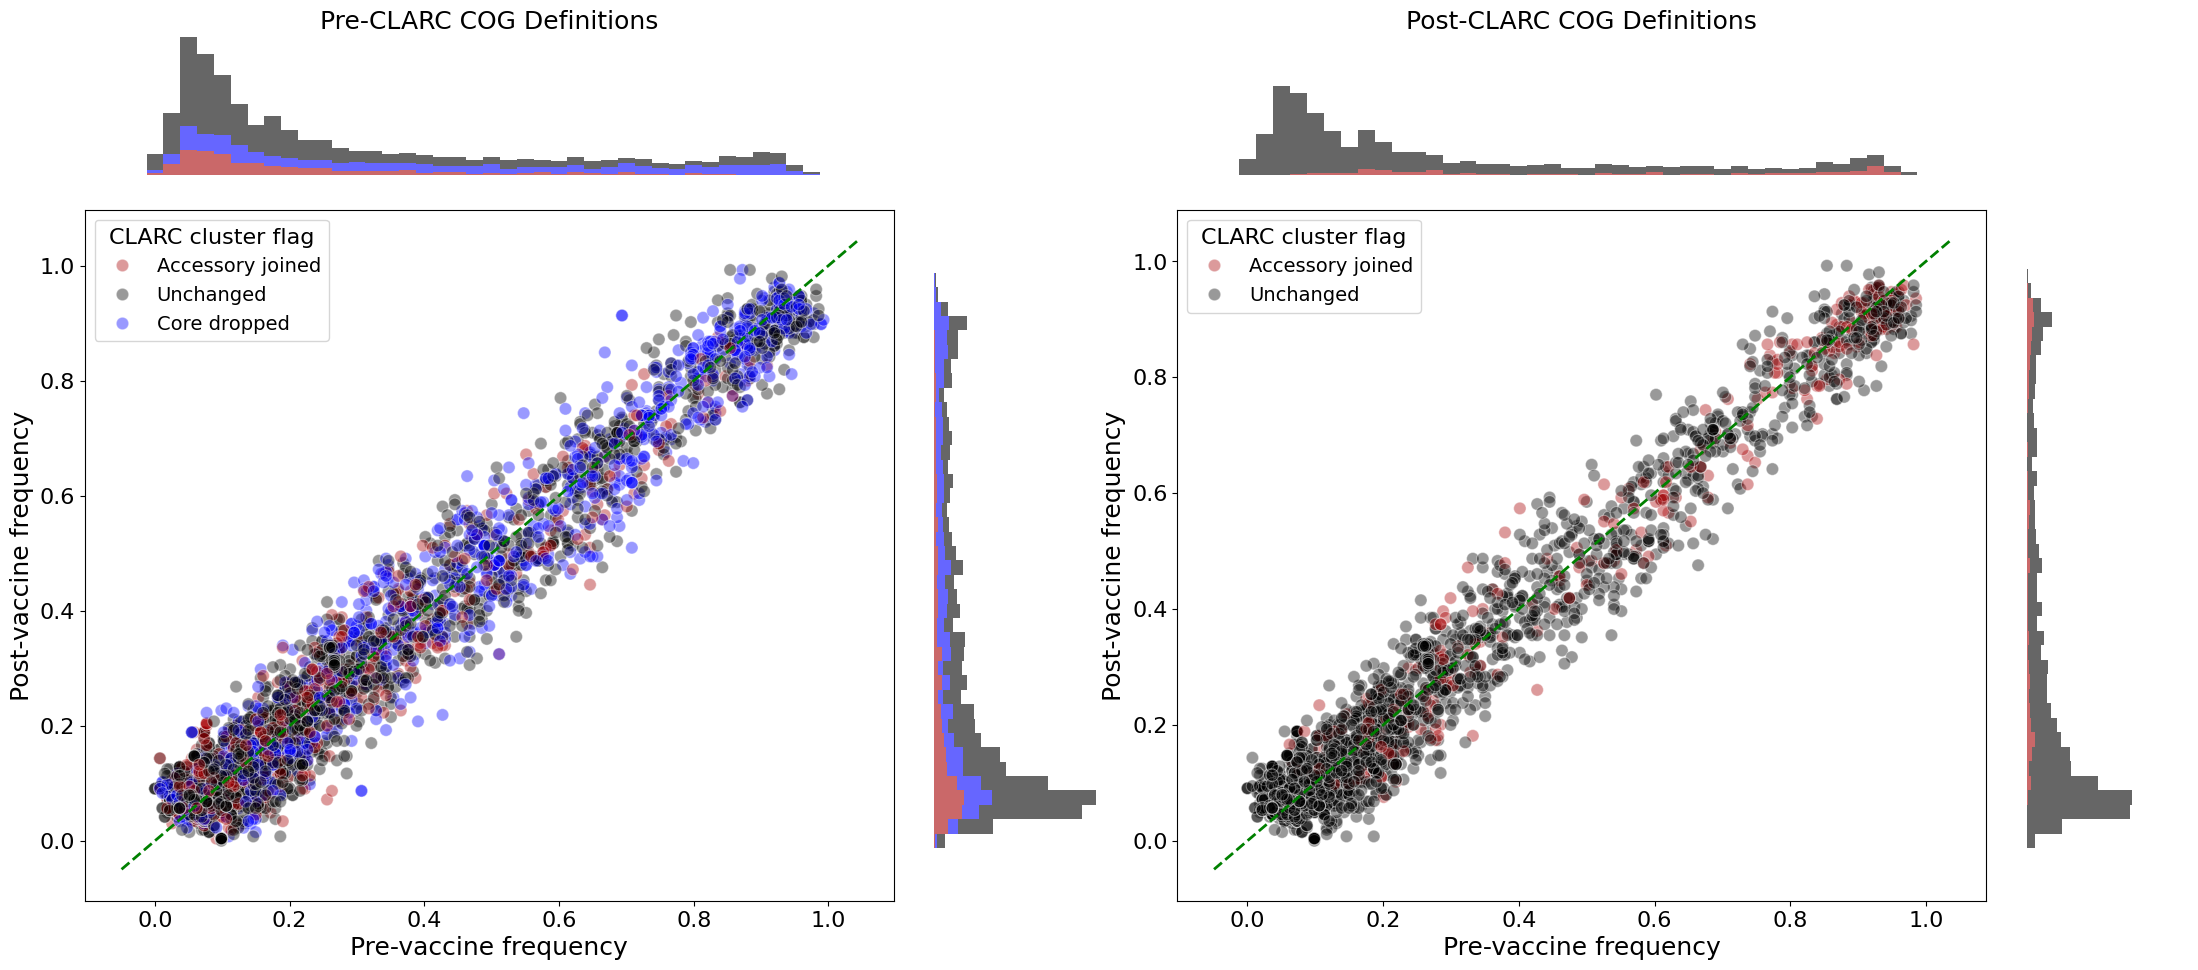

In [105]:
# Define color mapping
color_map = {'Accessory joined': '#A80306', 'Unchanged': 'k', 'Core dropped': 'b'}

# Calculate max counts across bins for uniform scaling
bins = np.arange(0, 1.05, 0.025)
max_count_x = max(
    np.histogram(navajo_roary_freqs['global_freq_E1'], bins=bins)[0].max(),
    np.histogram(navajo_clarc_freqs['global_freq_E1'], bins=bins)[0].max()
)
max_count_y = max(
    np.histogram(navajo_roary_freqs['global_freq_E3'], bins=bins)[0].max(),
    np.histogram(navajo_clarc_freqs['global_freq_E3'], bins=bins)[0].max()
)

# Set figure size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))

# First plot
ax1.set_title('Pre-CLARC COG Definitions', fontsize=18)
sns.scatterplot(
    data=navajo_roary_freqs, x='global_freq_E1', y='global_freq_E3', 
    hue='CLARC cluster flag', alpha=0.4, palette=color_map, ax=ax1, s=80  # Adjusted marker size
)
xpoints = ypoints = ax1.get_xlim()
ax1.plot(xpoints, ypoints, linestyle='--', color='g', lw=2)
ax1.legend(title='CLARC cluster flag', fontsize=14, title_fontsize='16')
ax1.set_xlabel('Pre-vaccine frequency', fontsize=18)
ax1.set_ylabel('Post-vaccine frequency', fontsize=18)
ax1.tick_params(axis='both', labelsize=16)

# Stacked bar plots for first plot
x_hist_ax1 = ax1.inset_axes([0, 1.05, 1, 0.2], sharex=ax1)
y_hist_ax1 = ax1.inset_axes([1.05, 0, 0.2, 1], sharey=ax1)

# Calculate and plot stacked bars
for label in color_map.keys():
    counts, _ = np.histogram(navajo_roary_freqs[navajo_roary_freqs['CLARC cluster flag'] == label]['global_freq_E1'], bins=bins)
    bottom = np.sum([np.histogram(navajo_roary_freqs[navajo_roary_freqs['CLARC cluster flag'] == l]['global_freq_E1'], bins=bins)[0] for l in color_map.keys() if l < label], axis=0)
    x_hist_ax1.bar(bins[:-1], counts, width=np.diff(bins), bottom=bottom, color=color_map[label], alpha=0.6)

    counts_y, _ = np.histogram(navajo_roary_freqs[navajo_roary_freqs['CLARC cluster flag'] == label]['global_freq_E3'], bins=bins)
    bottom_y = np.sum([np.histogram(navajo_roary_freqs[navajo_roary_freqs['CLARC cluster flag'] == l]['global_freq_E3'], bins=bins)[0] for l in color_map.keys() if l < label], axis=0)
    y_hist_ax1.barh(bins[:-1], counts_y, height=np.diff(bins), left=bottom_y, color=color_map[label], alpha=0.6)

x_hist_ax1.set_ylim(0, max_count_x)
y_hist_ax1.set_xlim(0, max_count_y)
x_hist_ax1.axis('off')
y_hist_ax1.axis('off')

# Second plot
ax2.set_title('Post-CLARC COG Definitions', fontsize=18)
sns.scatterplot(
    data=navajo_clarc_freqs, x='global_freq_E1', y='global_freq_E3', 
    hue='CLARC cluster flag', alpha=0.4, palette=color_map, ax=ax2, s=80  # Adjusted marker size
)
xpoints = ypoints = ax2.get_xlim()
ax2.plot(xpoints, ypoints, linestyle='--', color='g', lw=2)
ax2.legend(title='CLARC cluster flag', fontsize=14, title_fontsize='16')
ax2.set_xlabel('Pre-vaccine frequency', fontsize=18)
ax2.set_ylabel('Post-vaccine frequency', fontsize=18)
ax2.tick_params(axis='both', labelsize=16)

# Stacked bar plots for second plot
x_hist_ax2 = ax2.inset_axes([0, 1.05, 1, 0.2], sharex=ax2)
y_hist_ax2 = ax2.inset_axes([1.05, 0, 0.2, 1], sharey=ax2)

for label in color_map.keys():
    counts, _ = np.histogram(navajo_clarc_freqs[navajo_clarc_freqs['CLARC cluster flag'] == label]['global_freq_E1'], bins=bins)
    bottom = np.sum([np.histogram(navajo_clarc_freqs[navajo_clarc_freqs['CLARC cluster flag'] == l]['global_freq_E1'], bins=bins)[0] for l in color_map.keys() if l < label], axis=0)
    x_hist_ax2.bar(bins[:-1], counts, width=np.diff(bins), bottom=bottom, color=color_map[label], alpha=0.6)

    counts_y, _ = np.histogram(navajo_clarc_freqs[navajo_clarc_freqs['CLARC cluster flag'] == label]['global_freq_E3'], bins=bins)
    bottom_y = np.sum([np.histogram(navajo_clarc_freqs[navajo_clarc_freqs['CLARC cluster flag'] == l]['global_freq_E3'], bins=bins)[0] for l in color_map.keys() if l < label], axis=0)
    y_hist_ax2.barh(bins[:-1], counts_y, height=np.diff(bins), left=bottom_y, color=color_map[label], alpha=0.6)

x_hist_ax2.set_ylim(0, max_count_x)
y_hist_ax2.set_xlim(0, max_count_y)
x_hist_ax2.axis('off')
y_hist_ax2.axis('off')

plt.tight_layout()

plt.show()